In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('dataset_limpio.csv', header=None)
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data.columns = columns

# Mostrar las primeras filas de los datos
print(data.head())

# Separar características y etiquetas
X = data.drop(['income'], axis=1)
y = data['income']

# Aplicar One-Hot Encoding a algunas variables categóricas
X = pd.get_dummies(X, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

# Aplicar Label Encoding a la variable objetivo
le = LabelEncoder()
y = le.fit_transform(y)

# Mostrar las primeras filas de los datos procesados
print(X.head())

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Entrenar un modelo SVM con kernel RBF
svm_model = SVC(kernel='sigmoid')
svm_model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Crear una malla de puntos para trazar las fronteras de decisión
h = .02  # tamaño del paso en la malla
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predecir las clases para cada punto en la malla
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar el gráfico de fronteras de decisión
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('PCA Result with SVM Classification Boundaries using RBF Kernel')
plt.colorbar()
plt.show()

# Visualizar los resultados de PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
data = pd.read_csv('data_evaluacion (1).csv', header=None)
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data.columns = columns

# Crear un LabelEncoder
le = LabelEncoder()

# Lista de columnas categóricas
columnas_categoricas = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country', 'income']

# Aplicar LabelEncoder a las columnas categóricas
for col in columnas_categoricas:
    data[col] = le.fit_transform(data[col].astype(str))

# Asegurarse de que todas las columnas sean numéricas
data = data.apply(pd.to_numeric, errors='coerce')



# Guardar el dataset limpio
data.to_csv('dataset_limpio.csv', index=False)

In [ ]:
# Mostrar las primeras filas del dataset limpio
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


Primeras filas del dataset:
   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          1   77516          1             13               1   
1   50          0   83311          1             13               0   
2   38          3  215646          3              9               1   
3   53          3  234721          3              7               0   
4   28          3  338409          1             13               0   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             1     4    1          2174             0   
1           3             0     4    1             0             0   
2           4             1     4    1             0             0   
3           4             0     2    1             0             0   
4           7             5     2    0             0             0   

   hours-per-week  native-country  income  
0              40               0       0  
1              13               0   

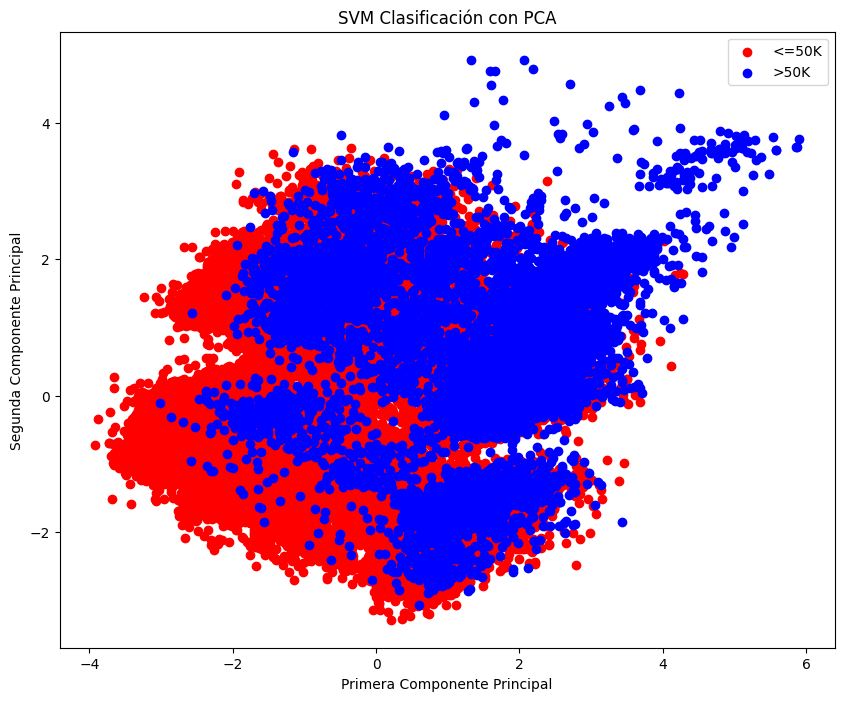

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

# Cargar el dataset limpio sin cabecera
data = pd.read_csv('dataset_limpio.csv', header=None)

# Asignar nombres a las columnas
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data.columns = columns

# Imprimir las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

# Separar características y etiquetas
X = data.drop('income', axis=1)
y = data['income']

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Entrenar el modelo SVM
svm_model = SVC(kernel='sigmoid', random_state=42)
svm_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = svm_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo SVM: {accuracy:.4f}")
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar los resultados
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', label='<=50K')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', label='>50K')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('SVM Clasificación con PCA')
plt.legend()
plt.show()